
Carolyn Massa:  Capstone 2
Word Clouds - This is my final notebook to show 2 word clouds according to listing rankings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd

#Word Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
import nltk
import string
from wordcloud import WordCloud,ImageColorGenerator


#Stats Modeling/Comparisons of Means


from shapely.geometry import Point
import shapely.ops as sp_ops
import pyproj
import functools

import ipywidgets as widgets





In [2]:
listing_2019_April_3 = pd.read_csv('listing_2019_April_3.csv',low_memory=False) # Here I import my cleaned data set from my primary notebook

In [3]:
df=pd.read_csv('listings_Details_2016_04.csv',low_memory=False)#Use for a reference for original DP

In [4]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3491996,https://www.airbnb.com/rooms/3491996,20160403131416,2016-04-04,Modern flat next to Montmartre Hill,NaN,"Modern one berdroom flat, close to all amnieti...","Modern one berdroom flat, close to all amnieti...",none,NaN,...,10.0,f,NaN,Paris,t,strict,f,f,1,0.97
1,1000434,https://www.airbnb.com/rooms/1000434,20160403131416,2016-04-04,"Charming, near Arc de Triomphe",NaN,My apartment is located in a very nice buildin...,My apartment is located in a very nice buildin...,none,NaN,...,9.0,f,NaN,Paris,f,moderate,f,f,1,0.25
2,3359862,https://www.airbnb.com/rooms/3359862,20160403131416,2016-04-04,Modern flat near Montmartre,Studio moderne et refait à neuf idéalement situé!,"Charming studio, cozy, and newly refurbished. ...",Studio moderne et refait à neuf idéalement sit...,none,"Family neighborhood, lively and well attended....",...,9.0,f,NaN,Paris,f,moderate,f,f,1,0.26
3,3476718,https://www.airbnb.com/rooms/3476718,20160403131416,2016-04-04,Les Batignolles au calme,Notre appartement est situé dans la rue la plu...,L'appartement se situe dans une rue très calme...,Notre appartement est situé dans la rue la plu...,none,"Le village des Batignolles est très animé, trè...",...,10.0,f,NaN,Paris,f,moderate,f,f,1,0.26
4,6890356,https://www.airbnb.com/rooms/6890356,20160403131416,2016-04-04,Une vue exceptionnelle sur Paris,Agréable petit appartement situé dans le quart...,"Studio très fonctionnel, totalement équipé, av...",Agréable petit appartement situé dans le quart...,none,Nombreux bars et restaurants. A proximité de n...,...,9.0,f,NaN,Paris,f,flexible,f,f,1,1.42


In [5]:
from wordcloud import WordCloud,ImageColorGenerator

In [6]:
def generate_wordcloud(df, save_file_name):
    """
    Generate top words used in listing names for the dataframe in consideration
    
    INPUTS:
        df - dataframe containing subset of listings to be used for wordcloud
    """
    punctuations = string.punctuation
    english_stopwords = stopwords.words("english")
    name_text=''
    for index, row in df.iterrows():
        name_text += " "
        name_text += row['name']
    name_text = nltk.word_tokenize(name_text)
    # Remove, punctuations, stopwords and numbers
    name_text = [word.lower() for word in name_text if word not in punctuations \
                 if not word.isdigit() if word not in english_stopwords]
    wnl = nltk.WordNetLemmatizer()
    name_text = [wnl.lemmatize(word) for word in name_text]
    name_text = ' '.join(name_text)
    name_wordcloud = WordCloud(width=1500,height=1000, background_color='white',\
                           max_words=200, random_state=100).generate(name_text)
    plt.figure(figsize=(15,10));
    plt.imshow(name_wordcloud);
    plt.axis("off");
    plt.show();
    name_wordcloud.to_file(save_file_name)

In [7]:
Paris_df = df.dropna(how='any', subset=['review_scores_rating'])

In [30]:


# Get all listings in the top 10% of ratings made in 2019
Paris_top_10_percent_list = Paris_df[Paris_df.review_scores_rating >=\
                                                 np.percentile(Paris_df.review_scores_rating,100)]



In [31]:
Paris_top_10_percent_list.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3491996,https://www.airbnb.com/rooms/3491996,20160403131416,2016-04-04,Modern flat next to Montmartre Hill,NaN,"Modern one berdroom flat, close to all amnieti...","Modern one berdroom flat, close to all amnieti...",none,NaN,...,10.0,f,NaN,Paris,t,strict,f,f,1,0.97
16,7278090,https://www.airbnb.com/rooms/7278090,20160403131416,2016-04-04,Cosy Apartment near Ternes/Maillot,Enjoy a nice stay in a 40m2 modern and designe...,NaN,Enjoy a nice stay in a 40m2 modern and designe...,none,NaN,...,10.0,f,NaN,Paris,f,flexible,f,f,1,0.23
17,9091251,https://www.airbnb.com/rooms/9091251,20160403131416,2016-04-03,Charmant studio aux Batignolles,Charmant studio de 25m2 tout juste rénové et t...,L'appartement fait 25m2: la pièce à vivre où s...,Charmant studio de 25m2 tout juste rénové et t...,none,Le quartier est typiquement parisien et très f...,...,10.0,f,NaN,Paris,f,flexible,f,f,1,0.21
19,6885604,https://www.airbnb.com/rooms/6885604,20160403131416,2016-04-04,Flat Montmartre- Batignolles,This quiet and very sunny flat has a real bedr...,"Charming Apartment, cozy. Ideally located in ...",This quiet and very sunny flat has a real bedr...,none,NaN,...,10.0,f,NaN,Paris,f,moderate,f,f,1,1.00
21,6595091,https://www.airbnb.com/rooms/6595091,20160403131416,2016-04-03,Appartement cosy à Paris,Charmant appartement de 33 m2 idéalement situé...,L'appartement est chaleureux et très lumineux....,Charmant appartement de 33 m2 idéalement situé...,none,Le 17 ème côté avenue des Ternes est un quarti...,...,9.0,f,NaN,Paris,f,strict,f,f,1,0.30


In [10]:
Paris_top_10_percent_list.drop(['listing_url','scrape_id','beds','experiences_offered','last_scraped','jurisdiction_names','requires_license','jurisdiction_names','instant_bookable','cancellation_policy'], axis=1,inplace=True)

C:\Users\1800r\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1800r\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

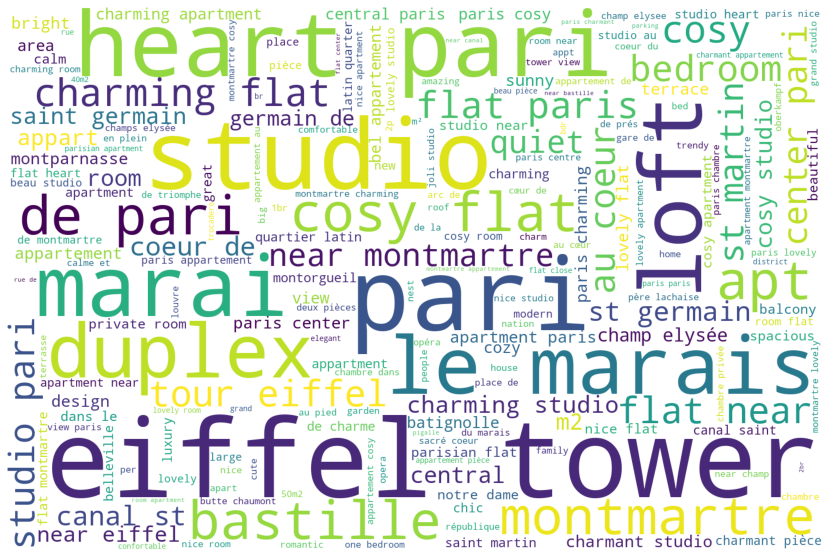

In [12]:
generate_wordcloud(Paris_top_10_percent_list, "Paris_World_Cloud.jpeg")

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1800r\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1800r\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Cloud 2 - Now let's examine the bottom 10% to see if there are any differences

In [44]:

# Get all listings in the bottom 10% for ratings
Paris_bottom_10_Percent = Paris_df[Paris_df.review_scores_rating <=\
                                                 np.percentile(Paris_df.review_scores_rating,10)]

In [45]:
Paris_bottom_10_Percent.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
5,5180445,https://www.airbnb.com/rooms/5180445,20160403131416,2016-04-04,Lovely apartment rue des Moines,Appartement de 34 m2 avec salon et chambre sép...,NaN,Appartement de 34 m2 avec salon et chambre sép...,none,NaN,...,9.0,f,NaN,Paris,f,moderate,f,f,1,0.23
8,9806126,https://www.airbnb.com/rooms/9806126,20160403131416,2016-04-04,JOLI APPARTEMENT PARIS 17,Appartement Paris 17 idéalement situé. Chambre...,NaN,Appartement Paris 17 idéalement situé. Chambre...,none,NaN,...,8.0,f,NaN,Paris,f,flexible,f,f,1,0.32
9,4783999,https://www.airbnb.com/rooms/4783999,20160403131416,2016-04-04,"Charming, central and cosy flat.",If you want to spend some special days in Pari...,This quiet appartament will be the best of ref...,If you want to spend some special days in Pari...,none,NaN,...,10.0,f,NaN,Paris,f,moderate,f,f,1,0.07
10,8319206,https://www.airbnb.com/rooms/8319206,20160403131416,2016-04-04,Cosy apartment in a great location,Cosy studio near Arc de Triomphe/Champs Élysées.,NaN,Cosy studio near Arc de Triomphe/Champs Élysée...,none,Very nice borough. There is a small food shop ...,...,7.0,f,NaN,Paris,f,moderate,f,f,1,0.37
18,10268058,https://www.airbnb.com/rooms/10268058,20160403131416,2016-04-03,Beau studio Paris Champs-Elysees,1 pièce 11m2 à 2 pas des Champs-Elysees. 7e e...,"A 2 pas des Champs, avec lit en mezzanine tout...",1 pièce 11m2 à 2 pas des Champs-Elysees. 7e e...,none,Un quartier calme à 2 pas de toutes les commod...,...,7.0,f,NaN,Paris,f,flexible,f,f,1,1.03


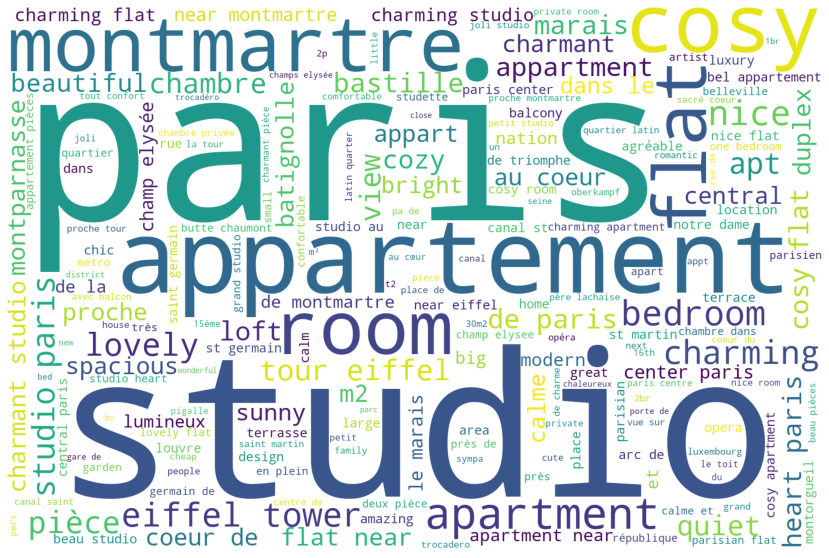

In [46]:
generate_wordcloud(Paris_bottom_10_Percent, "Paris_World_Cloud_2.jpeg")

We notice that the Eiffel Tower, Heart of Paris, is used more often than in the wordcloud in the bottom 10%.